# DENSITY BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE
**File:** DBSCAN.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import DBSCAN                # For DBSCAN
import numpy as np                                # For various computations
from sklearn.preprocessing import StandardScaler  # For standardizing data    
from sklearn.neighbors import NearestNeighbors    # For nearest neighbors

# LOAD AND PREPARE DATA
Read the `penguins.csv` file from the `data` directory in variable `df`. Keep all features in variable `df` and store the class variable in `y`. Also, standardize the data so each variable has a mean of zero and unit variance (i.e., variance and standard deviation of one).

In [2]:
# Reads the .csv file into variable df
df = pd.read_csv('data/penguins.csv')

# Separates the class variable in y
y = df.y

# Removes the y column from df
df = df.drop('y', axis=1)

# Standardizes df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

# Displays the first 5 rows of df
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


# DBSCAN: CLUSTERING DATA
There are two steps for running DBSCAN. In the first step, we'll determine the parameter values and in the second step, we'll fit the model to data.

## Step 1: Determine the Parameters
For DBSCAN clustering, we need two parameters:
- `min_samples`: Minimum number of neighboring points for clustering. 
- `eps`: Epsilon neighborhood radius

To find the optimal value of `eps`, we'll construct a plot of distances of `min_samples` (variable `k` in code below) nearest neighbors and look for a pronounced bend, also called a "knee." The code below uses the `NearestNeighbors` object to find the distances and plots them.

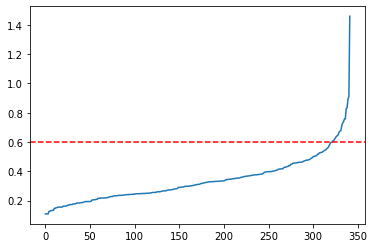

In [3]:
k = 7

# Fits a NearestNeighbors object to df
nn = NearestNeighbors(n_neighbors=k) \
    .fit(df)

# Finds the distance of k closest neighbors
dist, ind = nn.kneighbors(df)

# Sorts the distances
dist = np.sort(dist, axis=0)[:,1]

# Plots the distances
plt.plot(dist)

# Draws a horizontal line at the bend
plt.axhline(y=.6, color='red', ls='--')


## Step 2: Fit the Model
Create a DBSCAN object with the parameters found and visualize the clusters. Each point is colored according to its actual label. For comparison, each instance is drawn with a marker according to the label found by the clustering algorithm.

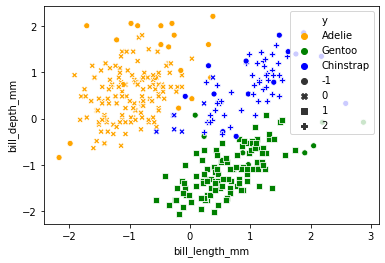

In [4]:
# Fits a DBSCAN object to df
db=DBSCAN(eps=0.6, min_samples=k) \
    .fit(df)

# Creates a scatter plot to visualize the clusters
sns.scatterplot(
    x='bill_length_mm', 
    y='bill_depth_mm',
    data=df, 
    hue=y,
    style=db.labels_,
    palette=['orange', 'green', 'blue'])

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.